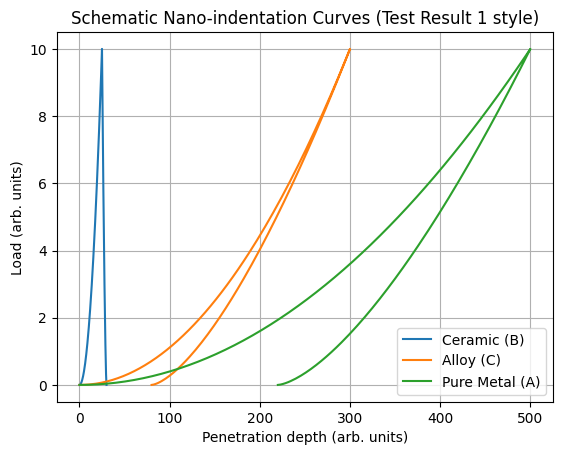

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def nano_indent_curve(Pmax, hmax, hf, n_points_load=100, n_points_unload=100, m_load=2.0, m_unload=1.5):
    """
    Simple schematic nano-indentation curve:
    - Loading: P = Pmax * (h / hmax)^m_load
    - Unloading: P = Pmax * ((h - hf) / (hmax - hf))^m_unload
    """
    # Loading segment
    h_load = np.linspace(0, hmax, n_points_load)
    P_load = Pmax * (h_load / hmax) ** m_load

    # Unloading segment (from hmax down to hf)
    h_unload = np.linspace(hmax, hf, n_points_unload)
    # Avoid division by zero
    denom = (hmax - hf)
    P_unload = Pmax * ((h_unload - hf) / denom) ** m_unload

    # Concatenate
    h = np.concatenate([h_load, h_unload])
    P = np.concatenate([P_load, P_unload])
    return h, P

# Parameters for "Graph 01" style example
Pmax = 10.0  # arbitrary units (e.g., mN)

# Choose different max depths and residual depths to mimic ceramic, alloy, pure metal
materials = {
    "Ceramic (B)": {"hmax": 25.0, "hf": 30.0},   # shallow depth, steep unload
    "Alloy (C)":   {"hmax": 300.0, "hf": 80.0},
    "Pure Metal (A)": {"hmax": 500.0, "hf": 220.0}  # deepest, shallower unload
}

plt.figure()

for name, params in materials.items():
    h, P = nano_indent_curve(Pmax=Pmax, hmax=params["hmax"], hf=params["hf"])
    plt.plot(h, P, label=name)

plt.xlabel("Penetration depth (arb. units)")
plt.ylabel("Load (arb. units)")
plt.title("Schematic Nano-indentation Curves (Test Result 1 style)")
plt.legend()
plt.grid(True)

plt.show()
